<a href="https://colab.research.google.com/github/swetha-singamsetti/Emplyee-Salary-Prediction/blob/main/Employee_Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
#load dataset
df = pd.read_csv('/content/adult 3 (1).csv')

# Preview
print(df.head())

   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country incom

In [ ]:
print(df.isnull().sum())

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


Preprocess the Data

In [ ]:
#clean spaces and replace '?' with NaN
df = df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)
df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)

In [ ]:
print(df.head())

   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
5   34    Private  198693          10th                6       Never-married   

          occupation   relationship   race gender  capital-gain  capital-loss  \
0  Machine-op-inspct      Own-child  Black   Male             0             0   
1    Farming-fishing        Husband  White   Male             0             0   
2    Protective-serv        Husband  White   Male             0             0   
3  Machine-op-inspct        Husband  Black   Male          7688             0   
5      Other-service  Not-in-family  White   Male             0             0   

   hours-per-week native-country

Convert Words to Numbers

In [ ]:
#Encode all categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [ ]:
print(df.head())

   age  workclass  fnlwgt  education  educational-num  marital-status  \
0   25          2  226802          1                7               4   
1   38          2   89814         11                9               2   
2   28          1  336951          7               12               2   
3   44          2  160323         15               10               2   
5   34          2  198693          0                6               4   

   occupation  relationship  race  gender  capital-gain  capital-loss  \
0           6             3     2       1             0             0   
1           4             0     4       1             0             0   
2          10             0     4       1             0             0   
3           6             0     2       1          7688             0   
5           7             1     4       1             0             0   

   hours-per-week  native-country  income  
0              40              38       0  
1              50              38 

Train Your Model

In [ ]:
#Split into features and target
X = df.drop('income', axis=1)
y = df['income']

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

from sklearn.ensemble import RandomForestClassifier

#Train a Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
print(df.head())

   age  workclass  fnlwgt  education  educational-num  marital-status  \
0   25          2  226802          1                7               4   
1   38          2   89814         11                9               2   
2   28          1  336951          7               12               2   
3   44          2  160323         15               10               2   
5   34          2  198693          0                6               4   

   occupation  relationship  race  gender  capital-gain  capital-loss  \
0           6             3     2       1             0             0   
1           4             0     4       1             0             0   
2          10             0     4       1             0             0   
3           6             0     2       1          7688             0   
5           7             1     4       1             0             0   

   hours-per-week  native-country  income  
0              40              38       0  
1              50              38 

In [ ]:
#Make predictions
y_pred = model.predict(X_test)

#Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

#Show accuracy and performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8564953012714207

 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      6842
           1       0.74      0.63      0.68      2203

    accuracy                           0.86      9045
   macro avg       0.81      0.78      0.79      9045
weighted avg       0.85      0.86      0.85      9045



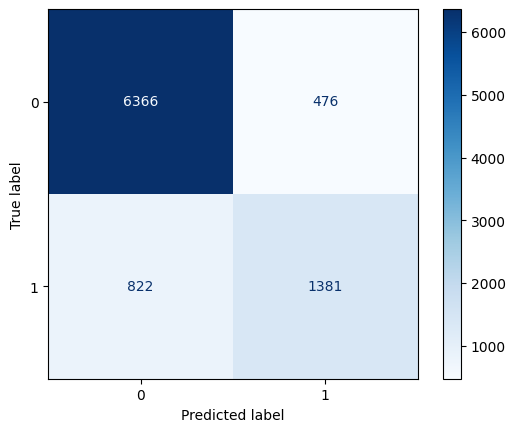

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

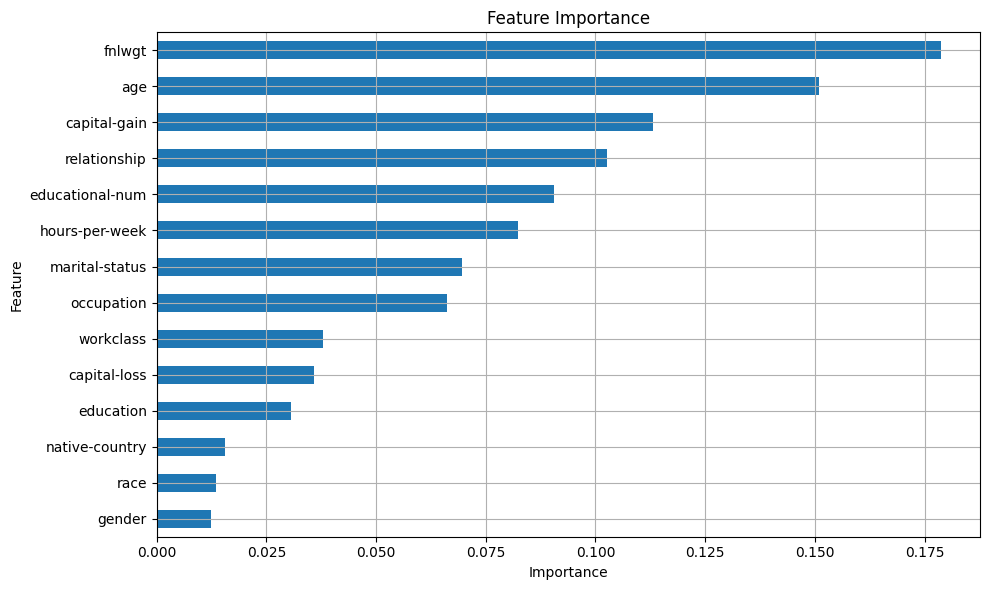

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

importances = model.feature_importances_
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names)

# Plot
plt.figure(figsize=(10,6))
forest_importances.sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(True)
plt.tight_layout()
plt.show()